In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
#Importing the image from the web
image_url = 'https://th.bing.com/th/id/R.d28c68b436bdfc73eea3b4cbefd38c9d?rik=plwWcBNfFk3FWA&pid=ImgRaw&r=0'

response = requests.get(image_url)

img = Image.open(BytesIO(response.content))

(-0.5, 1199.5, 799.5, -0.5)

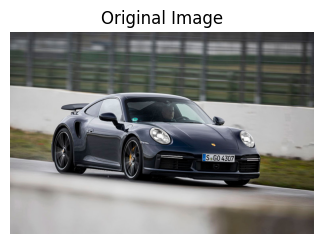

In [4]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

In [5]:
def reduce_intensity_levels(img, levels):
    new_levels = 2 ** levels
    divisor = 256 // new_levels
    reduced_img = np.array(img) // divisor * divisor
    return Image.fromarray(reduced_img)

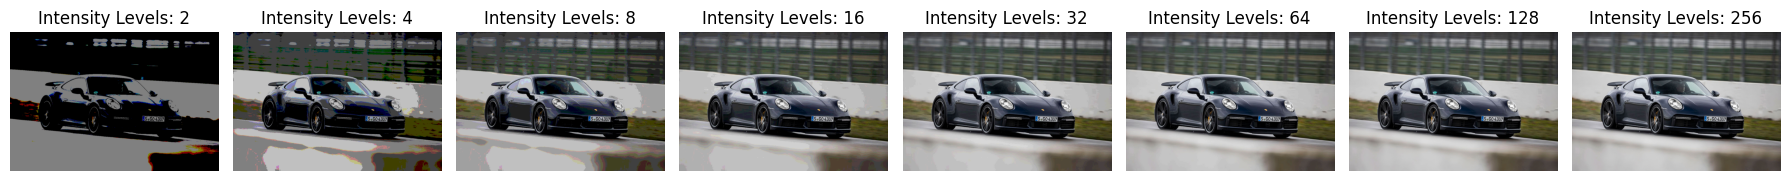

In [6]:
min_level = 1  # Minimum level
max_level = 8  # Maximum level

# Create subplots for each intensity level
plt.figure(figsize=(18, 6))
for i in range(min_level, max_level + 1):
    intensity_levels = i
    reduced_img = reduce_intensity_levels(img, intensity_levels)
    plt.subplot(1, max_level - min_level + 1, i)
    plt.imshow(reduced_img)
    plt.title(f'Intensity Levels: {2 ** i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def spatial_average(img, neighborhood_size):
    img_array = np.array(img)
    kernel = np.ones((neighborhood_size, neighborhood_size), np.float32) / (neighborhood_size * neighborhood_size)
    smoothed_img = cv2.filter2D(img_array, -1, kernel)
    return Image.fromarray(smoothed_img)

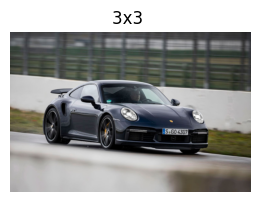

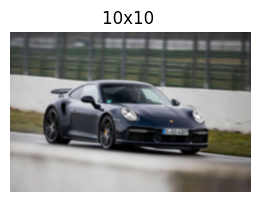

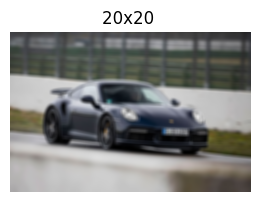

In [ ]:
neighborhood_sizes = [3, 10, 20]

for i, size in enumerate(neighborhood_sizes):
    spatial_avg_img = spatial_average(img, size)
    plt.figure(figsize=(18, 6))
    plt.subplot(1, len(neighborhood_sizes) + 2, i + 3)
    plt.imshow(spatial_avg_img)
    plt.title(f'{size}x{size} ')
    plt.axis('off')

#plt.tight_layout()
plt.show()

(-0.5, 1199.5, 799.5, -0.5)

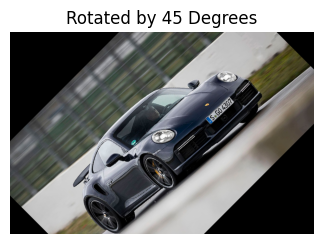

In [ ]:
# Rotate the image by 45 degrees
rotated_45 = img.rotate(45)
plt.figure(figsize=(18, 6))
plt.subplot(2, 4, 5)
plt.imshow(rotated_45)
plt.title('Rotated by 45 Degrees')
plt.axis('off')

(-0.5, 1199.5, 799.5, -0.5)

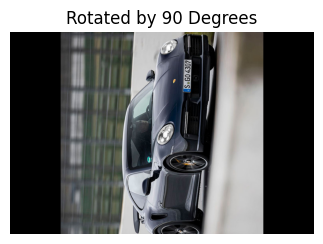

In [ ]:
# Rotate the image by 90 degrees
rotated_90 = img.rotate(90)
plt.figure(figsize=(18, 6))
plt.subplot(2, 4, 6)
plt.imshow(rotated_90)
plt.title('Rotated by 90 Degrees')
plt.axis('off')

In [ ]:
# Function to replace every block of specified size with its average
def block_average(img, block_size):
    img_array = np.array(img)
    height, width = img_array.shape[:2]
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = img_array[i:i+block_size, j:j+block_size]
            avg = np.mean(block)
            img_array[i:i+block_size, j:j+block_size] = avg
    return Image.fromarray(img_array)

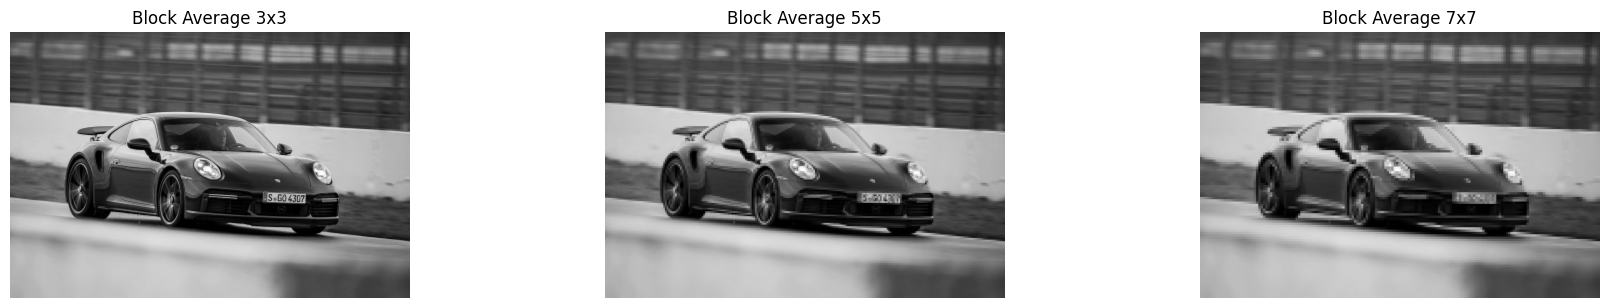

In [ ]:
# block sizes
block_sizes = [3, 5, 7]

plt.figure(figsize=(18, 6))
for i, block_size in enumerate(block_sizes):
    block_avg_img = block_average(img, block_size)
    plt.subplot(2, len(block_sizes), i + 1)
    plt.imshow(block_avg_img)
    plt.title(f'Block Average {block_size}x{block_size}')
    plt.axis('off')

plt.tight_layout()
plt.show()